In [97]:
## Importing necessary libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [99]:
from google.colab import drive

In [100]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd

In [102]:
df = pd.read_csv('/content/drive/MyDrive/AQI_Dataset/Book2.csv')

In [103]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN


In [104]:
df.shape

(249, 10)

In [105]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stn_code       249 non-null    int64  
 1   sampling_date  249 non-null    object 
 2   state          249 non-null    object 
 3   location       249 non-null    object 
 4   agency         105 non-null    object 
 5   type           144 non-null    object 
 6   so2            247 non-null    float64
 7   no2            247 non-null    float64
 8   rspm           0 non-null      float64
 9   spm            168 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 19.6+ KB


In [106]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

stn_code           0
sampling_date      0
state              0
location           0
agency           144
type             105
so2                2
no2                2
rspm             249
spm               81
dtype: int64

In [107]:
df.columns
# These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm'],
      dtype='object')

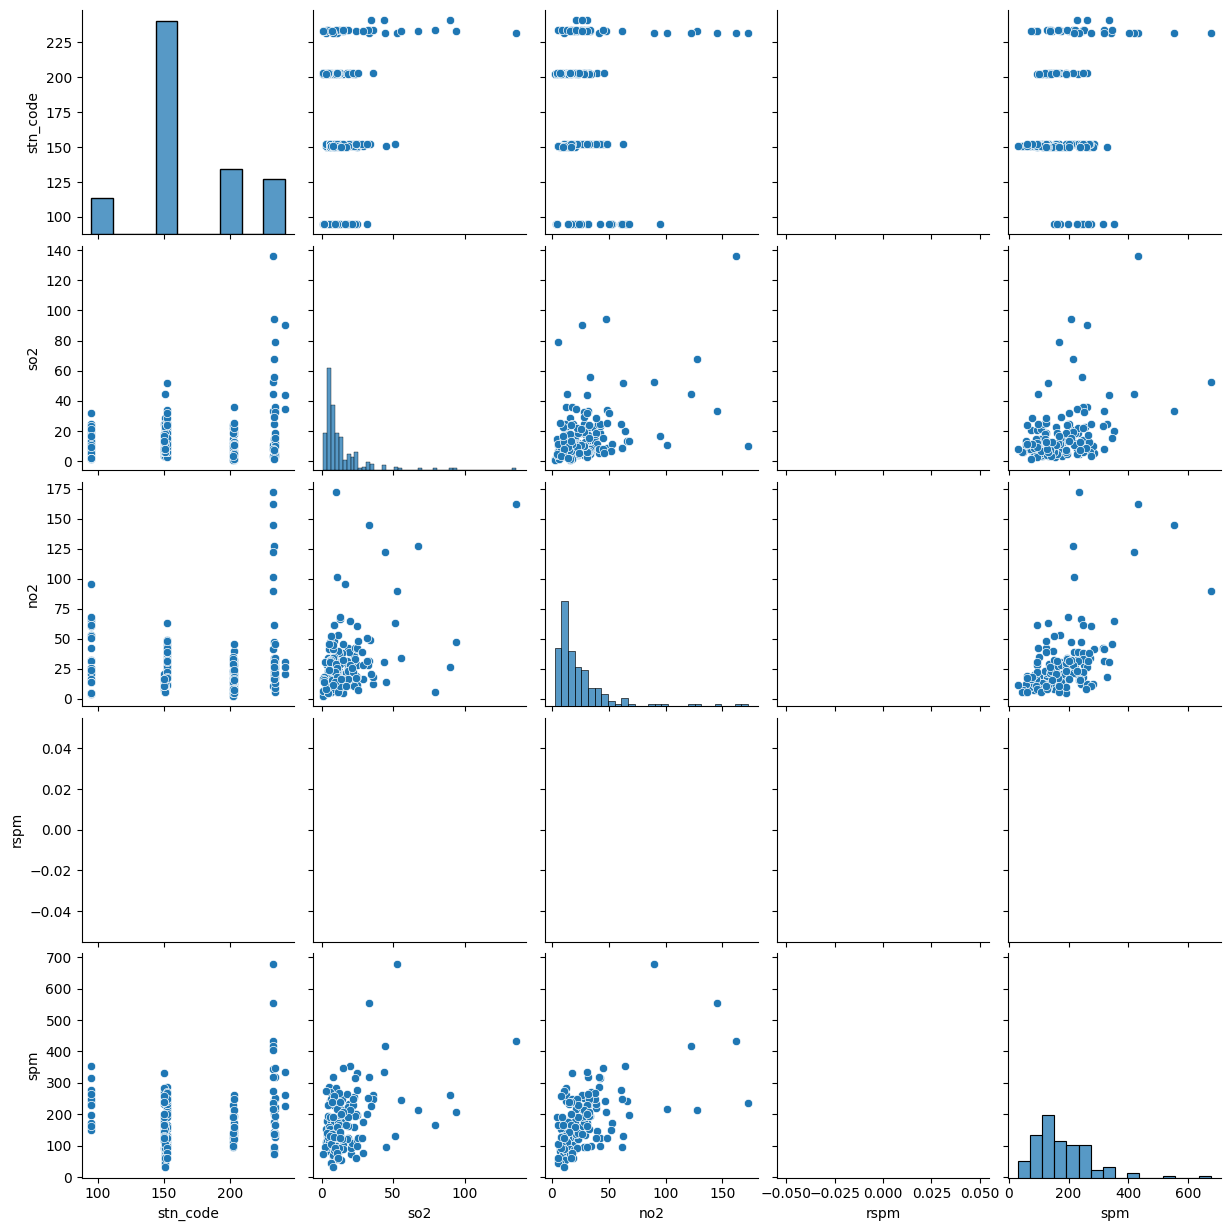

In [108]:
sns.pairplot(data=df)

<Axes: >

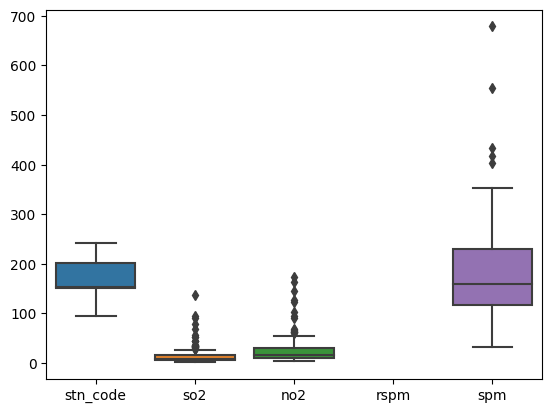

In [109]:
sns.boxplot(data=df)

In [110]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [111]:
nullvalues
# higher null values present in pm2_5 followed by spm

rspm             249
agency           144
type             105
spm               81
so2                2
no2                2
stn_code           0
sampling_date      0
state              0
location           0
dtype: int64

In [112]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [113]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [114]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
rspm,249,100.000000
agency,144,57.831325
type,105,42.168675
spm,81,32.530120
so2,2,0.803213
no2,2,0.803213
stn_code,0,0.000000
sampling_date,0,0.000000
state,0,0.000000
location,0,0.000000


In [115]:
df.isnull().sum()
# Now checking the null values

stn_code           0
sampling_date      0
state              0
location           0
agency           144
type             105
so2                2
no2                2
rspm             249
spm               81
dtype: int64

In [116]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
244,150,November - M111994,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",16.7,10.3,NaN,167.0
245,202,December - M121994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,3.1,8.5,NaN,NaN
246,203,December - M121994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,25.5,7.2,NaN,NaN
247,95,December - M121994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,2.0,14.2,NaN,NaN


In [117]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

In [118]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [119]:
df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

stn_code         0
sampling_date    0
state            0
location         0
agency           0
type             0
so2              0
no2              0
rspm             0
spm              0
dtype: int64

In [120]:
df
# The following features are important for our machine learning models.

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm
0,150,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0
1,151,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0
2,152,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0
3,150,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0
4,151,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
244,150,November - M111994,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",16.7,10.3,0.0,167.0
245,202,December - M121994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,"Residential, Rural and other Areas",3.1,8.5,0.0,0.0
246,203,December - M121994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,"Residential, Rural and other Areas",25.5,7.2,0.0,0.0
247,95,December - M121994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,"Residential, Rural and other Areas",2.0,14.2,0.0,0.0


CALCULATE AIR QUALITY INDEX FOR SO2

In [121]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


CALCULATE AIR QUALITY INDEX FOR NO2

In [122]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


Function to calculate rspm individual pollutant index(rpi)

In [123]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Function to calculate spm individual pollutant index(spi)

In [124]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


function to calculate the air quality index (AQI) of every data value

In [125]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Calculating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [126]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    else:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,150,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,151,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,152,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,150,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,151,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [127]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

Poor              107
Good               77
Moderate           39
Unhealthy          20
Very unhealthy      3
Hazardous           3
Name: AQI_Range, dtype: int64

Splitting the dataset into Dependent and Independent columns

In [128]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [129]:
Y.head()
# the AQI column is the target column

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(199, 4) (50, 4) (199,) (50,)


Decision Tree Regression Algorithm

In [131]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [132]:
#predicting on train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [133]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  1.7448346960763488e-15
RMSE TestData =  2.5173977966675563
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9987855049181934


Random Forest Regression Algorithm

In [134]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [135]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [136]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  3.313600107928049
RMSE TestData =  3.1669394759022103
--------------------------------------------------
RSquared value on train: 0.9985576443968245
RSquared value on test: 0.9980779194144255
